# Capítulo 8: Reducción de Dimensionalidades

## Reducción de Dimensionalidad — Qué es y para qué sirve

---

## 1. PCA (Análisis de Componentes Principales)
**Qué es:**  
Un método de reducción de dimensionalidad que proyecta los datos en nuevas variables (componentes principales) que capturan la mayor parte de la variación del dataset.

**Para qué sirve:**  
- Reducir el número de características manteniendo la mayor información posible.  
- Visualizar datos de alta dimensión.  
- Acelerar modelos de machine learning al eliminar redundancia.  
- Mitigar el ruido en los datos.

---

### 1.1 PCA con Scikit-Learn
**Qué es:**  
La implementación de PCA en la librería scikit-learn, que calcula automáticamente los componentes principales y las proyecciones.

**Para qué sirve:**  
- Aplicar PCA de forma sencilla y eficiente.  
- Integrarlo con pipelines y otros modelos de ML.  
- Explorar cuánta varianza se retiene según la cantidad de componentes.

---

### 1.2 PCA Incremental
**Qué es:**  
Una variante del PCA estándar que procesa los datos por lotes, sin necesidad de cargar todo el dataset en memoria.

**Para qué sirve:**  
- Trabajar con datasets muy grandes o que no caben en RAM.  
- Realizar reducción de dimensionalidad en flujos continuos de datos.

---

## 2. Kernel PCA
**Qué es:**  
Una extensión no lineal de PCA que utiliza funciones kernel para proyectar los datos en un espacio de mayor dimensión donde patrones complejos pueden volverse lineales.

**Para qué sirve:**  
- Capturar estructuras no lineales que el PCA tradicional no puede.  
- Mejorar tareas de clasificación o clustering tras la reducción.  
- Visualizar datos con forma de espiral, curvas o patrones complejos.

---

### 2.1 Seleccionar un Kernel
**Qué es:**  
El proceso de elegir una función kernel (RBF, sigmoide, polinomial, etc.) para definir cómo se miden las similitudes en Kernel PCA.

**Para qué sirve:**  
- Controlar el tipo de transformación no lineal aplicada.  
- Ajustar el modelo para detectar estructuras específicas en los datos.  
- Mejorar la separación entre grupos o clases en el espacio reducido.

---

## 3. LLE (Locally Linear Embedding)
**Qué es:**  
Un método de reducción de dimensionalidad no lineal que preserva las relaciones locales entre los puntos. En lugar de buscar componentes globales como PCA, se enfoca en reconstruir cada punto a partir de sus vecinos cercanos.

**Para qué sirve:**  
- Visualizar datos que se encuentran en variedades (manifolds) no lineales.  
- Capturar estructuras complejas preservando la geometría local.  
- Es especialmente útil cuando la forma de los datos es curva o intrincada (ej., "Swiss roll").



## <span style="color:green">1. PCA</span>

PCA=Principal Component Analysis

In [1]:
#Importa los librerías pandas, numpy, matplotlib, os.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 

In [2]:
# Trae los datos que necesitamos
candidates = {
    'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
    'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
    'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
    'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
}


In [3]:
df = pd.DataFrame(candidates)

X = df[['gmat', 'gpa', 'work_experience']]
y = df['admitted']

In [4]:
import numpy as np

# Centrar X restándole la media
X_centrado = X - X.mean()

# Descomposición SVD
U, S, Vt = np.linalg.svd(X_centrado, full_matrices=False)

# Los primeros 2 componentes principales
componentes_principales = Vt[:2].T  # transponemos para que cada columna sea un componente

componentes_principales


array([[-0.99991795, -0.01224184],
       [-0.00576901,  0.16747873],
       [-0.01143706,  0.98579968]])

Para proyectar nuestros datos en el hiperplano y obtener nuestra matriz X de dimensiones reducidas
tenemos que XNUEVA = XW donde X es nuestra matriz de datos original y W es la matriz 
que contiene nuestros vectores de componentes principales.

In [5]:
W = Vt.T[:, :2]

X_nueva = X_centrado.dot(W)
X_nueva.head()


,0,1
0,-125.990022,-1.809869
1,-96.003344,-0.473562
2,-35.993368,-0.825338
3,-56.016909,0.968416
4,-26.009087,0.383367


### <span style="color:blue">1.1 Con Scikit</span>

In [6]:
from sklearn.decomposition import PCA

# Crear el objeto PCA para reducir a 2 componentes
pca = PCA(n_components=2)


In [9]:
# Ajustar PCA y transformar los datos
X_pca = pca.fit_transform(X)

# Distribución de la varianza explicada
varianza = pca.explained_variance_ratio_
varianza


array([9.99258771e-01, 6.86720501e-04])

Esta distribución nos indica la proporción de varianza que cada componente principal contiene en comparación al set de datos original.

In [10]:
# Crear PCA que conserve al menos el 90% de la varianza
pca_90 = PCA(n_components=0.9)

# Ajustar y transformar los datos
X_pca_90 = pca_90.fit_transform(X)

# Ver cuántos componentes se han retenido
n_componentes = pca_90.n_components_
n_componentes


1

***

In [13]:
from sklearn.decomposition import PCA

# Descomprimir los datos usando inverse_transform
pca = PCA(n_components=1)
X_nueva = pca.fit_transform(X)
X_recuperada = pca.inverse_transform(X_nueva)

Se pierde fidelidad porque no explica la variación en todos los datos pero es suficiente para entrenar al algoritmo

***

### <span style="color:blue">1.2 PCA Incremental</span>

In [15]:
from sklearn.decomposition import IncrementalPCA

# Crear el objeto IncrementalPCA con 2 componentes
ipca = IncrementalPCA(n_components=2)

# Dividir X en 3 subsets aproximadamente iguales
subsets = np.array_split(X, 3)


***

## <span style="color:green">2. Kernel PCA</span>

In [17]:
from sklearn.decomposition import KernelPCA

# Crear KernelPCA con kernel RBF y 2 componentes
kpca = KernelPCA(n_components=2, kernel='rbf')

# Ajustar y transformar los datos
X_kpca = kpca.fit_transform(X)

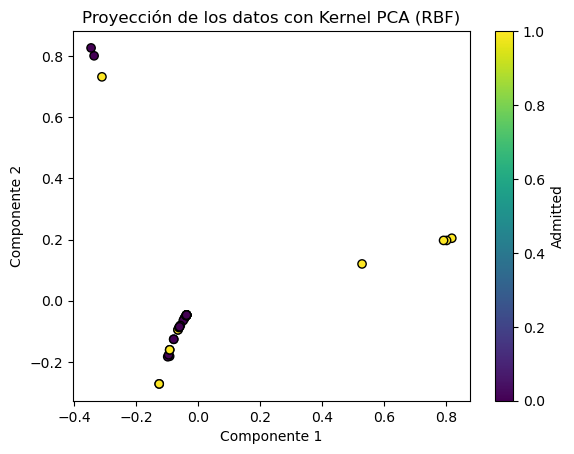

In [18]:
# Visualizar los datos proyectados por KernelPCA
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Proyección de los datos con Kernel PCA (RBF)')
plt.colorbar(label='Admitted')
plt.show()


### <span style="color:blue">2.1 Seleccionar un Kernel</span>

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA

# Crear el pipeline: KernelPCA seguido de LogisticRegression
pipe = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])


In [20]:
# Definir el grid de parámetros
param_grid = {
    'kpca__gamma': [0.01, 0.1, 1, 10],  # parámetros del kernel RBF
    'kpca__n_components': [2, 3, 4],    # número de componentes principales
    'log_reg__C': [0.1, 1, 10]          # regularización de la regresión logística
}

# Crear GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

# Ajustar el GridSearchCV a los datos
grid_search.fit(X, y)

# Mejor combinación de parámetros
grid_search.best_params_


{'kpca__gamma': 0.01, 'kpca__n_components': 2, 'log_reg__C': 10}

## <span style="color:green">2. LLE</span>

LLE= Locally Linear Embedding

Es un método de reducción de dimensionalidad no lineal y **no depende de proyecciones**

Funciona midiendo como cada instancia de entrenamiento se relaciona linealmente con sus instancias vecinas y busca una representación lineal de pocas dimensiones del set de datos donde estas relaciones entre instancias cercanas o vecinas están bien preservadas. 

In [21]:
from sklearn.manifold import LocallyLinearEmbedding

# Crear objeto LLE
lle = LocallyLinearEmbedding(
    n_components=2,  # número de dimensiones reducidas
    n_neighbors=5,   # cantidad de vecinos para reconstrucción local
    method='standard' # método estándar de LLE
)

# Ajustar y transformar los datos
X_lle = lle.fit_transform(X)

# Mostrar las primeras filas de la transformación
X_lle[:5]


array([[ 0.17455358,  0.54429708],
       [ 0.16458675,  0.31468021],
       [ 0.14479511, -0.15096839],
       [ 0.151172  ,  0.00563436],
       [ 0.11317562, -0.13502106]])